In [1240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing  import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor,BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error
import joblib




import warnings
warnings.filterwarnings("ignore")

In [1241]:
data = pd.read_csv('/Users/saptarshipal/DATA/boston_house_pricing_regression/data/Delhi_v2.csv')
data = pd.DataFrame(data)


In [1242]:
data = data.drop(columns = ['Unnamed: 0','Address','Landmarks','desc','latitude','longitude'])
data.head()

,price,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
0,5600000.0,1350.0,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,Flat,4148.148148
1,8800000.0,1490.0,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,Flat,5906.040268
2,16500000.0,2385.0,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,Flat,6918.238994
3,3810000.0,1050.0,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,Flat,3628.571429
4,6200000.0,1350.0,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,Flat,4592.592593


In [1243]:
data.shape

(7738, 12)

In [1244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   area              7738 non-null   float64
 2   Bedrooms          7738 non-null   float64
 3   Bathrooms         7738 non-null   float64
 4   Balcony           5166 non-null   float64
 5   Status            7164 non-null   object 
 6   neworold          7738 non-null   object 
 7   parking           2612 non-null   float64
 8   Furnished_status  4124 non-null   object 
 9   Lift              1733 non-null   float64
 10  type_of_building  7738 non-null   object 
 11  Price_sqft        7738 non-null   float64
dtypes: float64(8), object(4)
memory usage: 725.6+ KB


In [1245]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,7738.0,8.320635e+06,7.223197e+06,1700000.0,4.200000e+06,6.000000e+06,9.500000e+06,8.500000e+07
area,7738.0,1.409507e+03,7.189296e+02,501.0,9.900000e+02,1.250000e+03,1.650000e+03,9.500000e+03
Bedrooms,7738.0,2.708193e+00,8.770258e-01,2.0,2.000000e+00,3.000000e+00,3.000000e+00,1.000000e+01
Bathrooms,7738.0,2.501163e+00,8.670501e-01,2.0,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01
Balcony,5166.0,2.426442e+00,1.083677e+00,1.0,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01
parking,2612.0,7.673047e+00,6.041751e+01,1.0,1.000000e+00,1.000000e+00,2.000000e+00,1.406000e+03
Lift,1733.0,1.829198e+00,1.192607e+00,0.0,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01
Price_sqft,7738.0,5.543660e+03,2.408659e+03,2100.0,3.950987e+03,4.972674e+03,6.350639e+03,4.437870e+04


# Imputing

In [1246]:
data.isnull().sum()

price                  0
area                   0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
type_of_building       0
Price_sqft             0
dtype: int64

In [1247]:
data['Furnished_status'].value_counts()

Furnished_status
Semi-Furnished    2199
Unfurnished       1230
Furnished          695
Name: count, dtype: int64

In [1248]:
data['Status'].value_counts()

Status
Ready to Move         7148
Under Construction      16
Name: count, dtype: int64

In [1249]:
imputer1 = SimpleImputer(missing_values=np.nan,strategy='most_frequent')


data['Balcony'] = imputer1.fit_transform(data[['Balcony']])
data['parking'] = imputer1.fit_transform(data[['parking']])
data['Lift'] = imputer1.fit_transform(data[['Lift']])

data['Status'] = data['Status'].fillna('Ready to Move')
data['Furnished_status'] = data['Furnished_status'].fillna('Semi-Furnished')


In [1250]:
data.isnull().sum()

price               0
area                0
Bedrooms            0
Bathrooms           0
Balcony             0
Status              0
neworold            0
parking             0
Furnished_status    0
Lift                0
type_of_building    0
Price_sqft          0
dtype: int64

# Encoding

In [1251]:
encoder1 = LabelEncoder()
columns1 = ['Status','neworold','Furnished_status','type_of_building']

data['Status'] = encoder1.fit_transform(data['Status'])
data['neworold'] = encoder1.fit_transform(data['neworold'])
data['Furnished_status'] = encoder1.fit_transform(data['Furnished_status'])
data['type_of_building'] = encoder1.fit_transform(data['type_of_building'])


In [1252]:
data.head()

,price,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
0,5600000.0,1350.0,3.0,3.0,2.0,1,0,1.0,1,2.0,0,4148.148148
1,8800000.0,1490.0,3.0,3.0,2.0,0,0,1.0,1,2.0,0,5906.040268
2,16500000.0,2385.0,4.0,5.0,2.0,0,0,1.0,2,2.0,0,6918.238994
3,3810000.0,1050.0,2.0,2.0,3.0,0,0,1.0,2,2.0,0,3628.571429
4,6200000.0,1350.0,2.0,2.0,3.0,0,1,1.0,1,3.0,0,4592.592593


# EDA and Data Cleaning

In [1253]:
df1 = data.copy()

<Axes: >

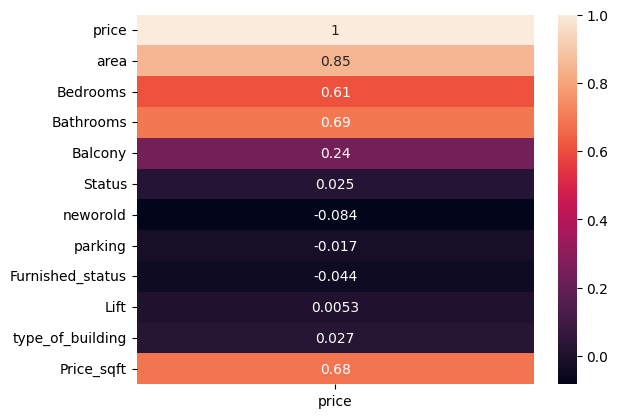

In [1254]:
plt.Figure(figsize=(15,15))
sns.heatmap(df1.corr()[['price']],annot = True)

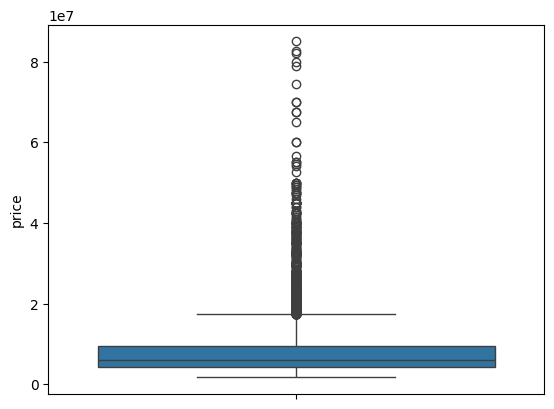

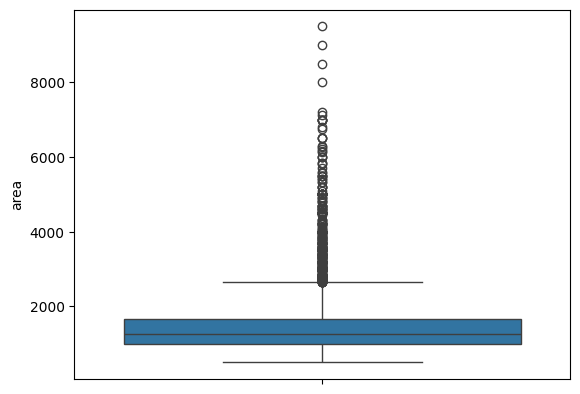

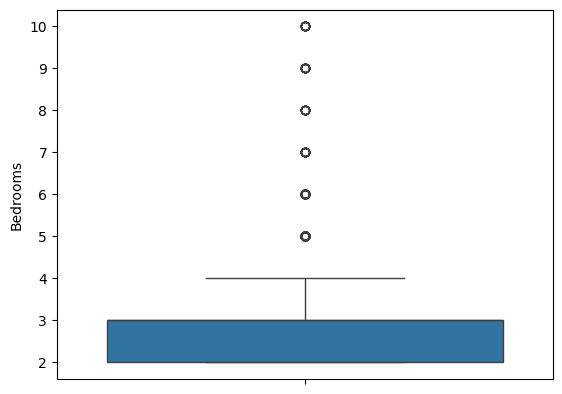

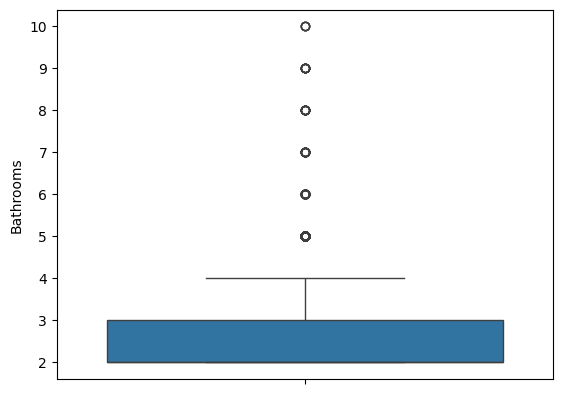

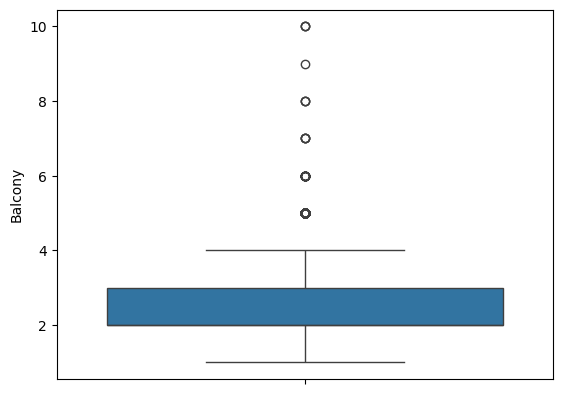

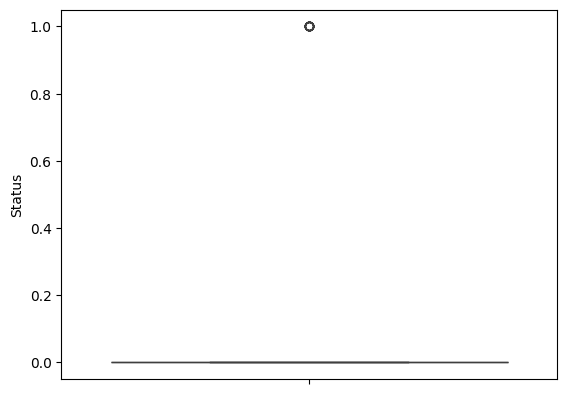

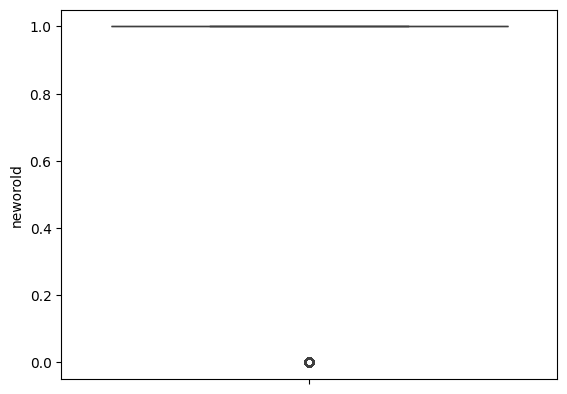

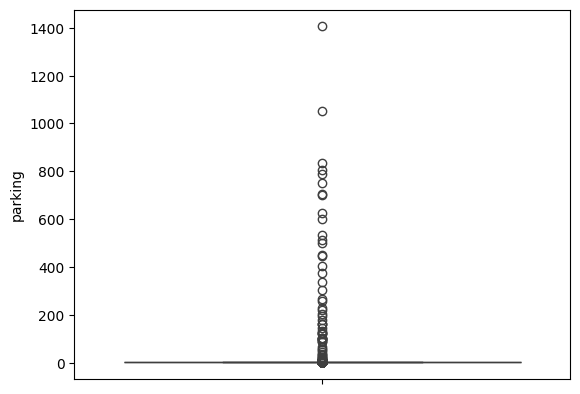

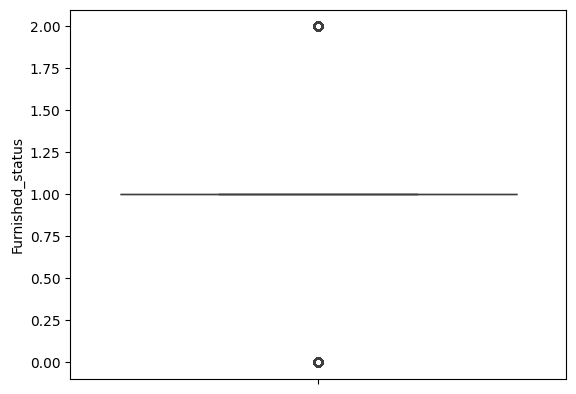

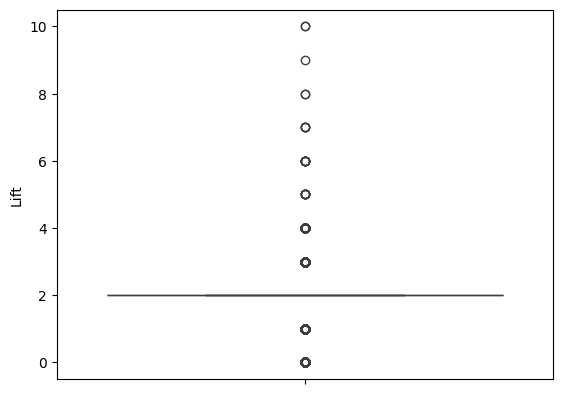

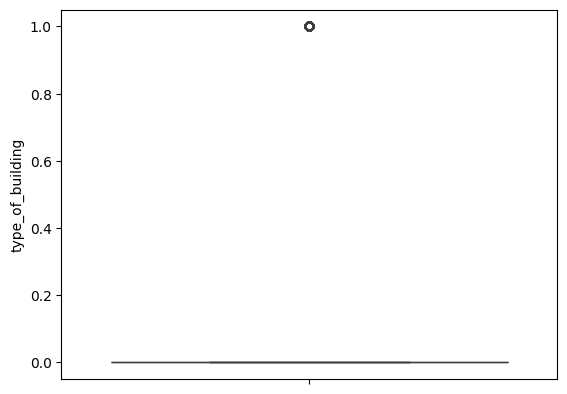

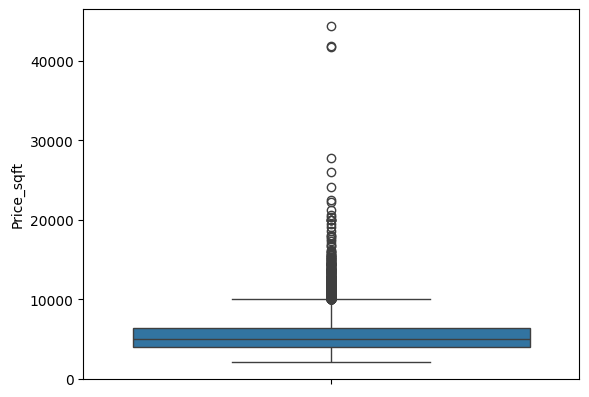

In [1255]:
for col in df1.columns:
    sns.boxplot(df1[col])
    plt.show()

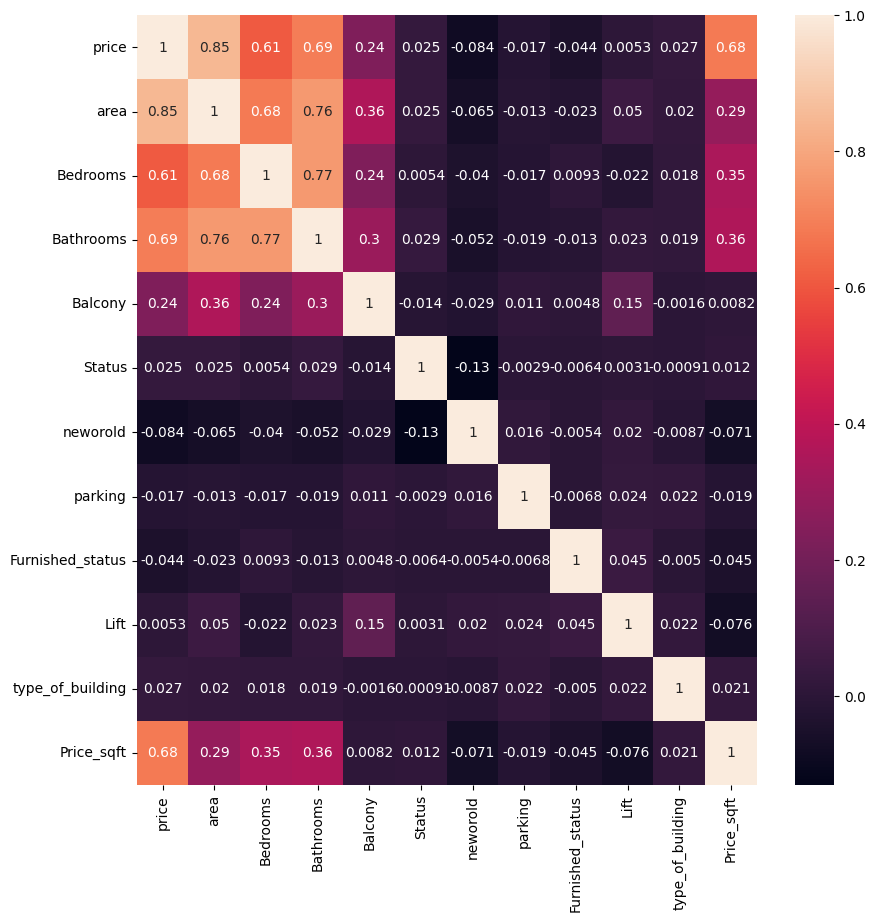

In [1256]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot =True)
plt.show()

In [1257]:
df1.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
price,7738.0,8320634.53,7223197.50,1700000.0,4200000.00,6000000.00,9500000.00,85000000.0
area,7738.0,1409.51,718.93,501.0,990.00,1250.00,1650.00,9500.0
Bedrooms,7738.0,2.71,0.88,2.0,2.00,3.00,3.00,10.0
Bathrooms,7738.0,2.50,0.87,2.0,2.00,2.00,3.00,10.0
Balcony,7738.0,2.28,0.91,1.0,2.00,2.00,3.00,10.0
Status,7738.0,0.00,0.05,0.0,0.00,0.00,0.00,1.0
neworold,7738.0,0.89,0.31,0.0,1.00,1.00,1.00,1.0
parking,7738.0,3.25,35.24,1.0,1.00,1.00,1.00,1406.0
Furnished_status,7738.0,1.07,0.49,0.0,1.00,1.00,1.00,2.0
Lift,7738.0,1.96,0.57,0.0,2.00,2.00,2.00,10.0


In [1258]:
df1.drop(df1[df1['area']>3500].index,axis = 0,inplace=True)
df1.drop(df1[df1['Bedrooms']>3.0].index,axis = 0,inplace=True)
df1.drop(df1[df1['Bathrooms']>4.0].index,axis = 0,inplace=True)
#df1.drop(df1[df1['Balcony']>4.0].index,axis = 0,inplace=True)
#df1.drop(df1[df1['parking']>2.0].index,axis = 0,inplace=True)
df1.drop(df1[df1['Lift']>2.0].index,axis = 0,inplace=True)
#df1.drop(columns='type_of_building',axis = 1,inplace=True)
df1.drop(df1[df1['Price_sqft']>10000.0].index,axis = 0,inplace=True)
df1.drop(columns='neworold',axis = 1,inplace=True)
df1.drop(columns='Furnished_status',axis = 1,inplace=True)
#df1.drop(columns='Status',axis = 1,inplace=True)



# Splitting the dataset

In [1259]:
y = df1['price']
X = df1.drop(columns = 'price')

In [1260]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=567)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5040, 9) (1261, 9) (5040,) (1261,)


# Scaling

In [1261]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

X_train_sc = scaler2.fit_transform(X_train)
X_test_sc = scaler2.fit_transform(X_test)

X_train = pd.DataFrame(X_train_sc,columns = X_train.columns)
X_test = pd.DataFrame(X_test_sc, columns = X_test.columns)

# Modelling

In [1262]:
def evaluate_regressors(X_train,X_test,y_train,y_test):
    models = {'lr':LinearRegression()
            ,'ridge':Ridge()
            ,'lasso':Lasso()
            ,'ElasticNet':ElasticNet()
            ,'SGDRegressor':SGDRegressor()
            ,'BayesianRidge':BayesianRidge()
            ,'DecisionTreeRegressor':DecisionTreeRegressor()
            ,'RandomForestRegressor':RandomForestRegressor()
            ,'ExtraTreesRegressor':ExtraTreesRegressor()
            ,'KNeighborsRegressor':KNeighborsRegressor()
            ,'SVR':SVR()
            ,'GaussianProcessRegressor':GaussianProcessRegressor()}
    
    results = []
    for name,model in models.items():
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test,y_pred)
        r2 = r2_score(y_test,y_pred)
        results.append({"name":name,'model':model,'mae':mae,'r2':r2})
        
    df_results = pd.DataFrame(results).sort_values(by=['mae'],ascending=True, ignore_index= True).round(2)
    return df_results

df_scores = evaluate_regressors(X_train,X_test,y_train,y_test)
print(df_scores)

                        name  \
0        ExtraTreesRegressor   
1      RandomForestRegressor   
2      DecisionTreeRegressor   
3   GaussianProcessRegressor   
4        KNeighborsRegressor   
5                      ridge   
6              BayesianRidge   
7                      lasso   
8                         lr   
9               SGDRegressor   
10                ElasticNet   
11                       SVR   

                                                model         mae    r2  
0   (ExtraTreeRegressor(random_state=1567256886), ...    83307.14  1.00  
1   (DecisionTreeRegressor(max_features=1.0, rando...    90491.67  1.00  
2                             DecisionTreeRegressor()   133790.64  0.99  
3                          GaussianProcessRegressor()   282145.18  0.88  
4                               KNeighborsRegressor()   293717.68  0.96  
5                                             Ridge()   408459.62  0.97  
6                                     BayesianRidge()   408566.47

In [1263]:
print("The best model is "+str(df_scores.iloc[0,0])+ " with the r2 of "+str(df_scores.iloc[0,3]))

The best model is ExtraTreesRegressor with the r2 of 1.0


In [1264]:
# standardscaler -- extratreeregressor

In [1265]:
selected_model = df_scores.iloc[0,1]
selected_model

ExtraTreesRegressor()

# Cross validation

In [1266]:
sm = []

for i in range(2,20):
    
    cv_score = cross_val_score(selected_model,X_train_sc,y_train,cv=i)
    sm.append({'cv':i,'score':cv_score.mean()})

cv_score_df = pd.DataFrame(sm).sort_values(by='score',ascending=False, ignore_index= True)
print(cv_score_df)
print("\nThe cv with the best score is "+str(cv_score_df.iloc[0,0]))

    cv     score
0   14  0.998694
1   17  0.998659
2   18  0.998627
3   16  0.998621
4   12  0.998603
5   15  0.998598
6    6  0.998586
7   19  0.998573
8   11  0.998569
9   13  0.998531
10   4  0.998526
11   8  0.998524
12   9  0.998474
13  10  0.998450
14   5  0.998394
15   7  0.998351
16   3  0.997877
17   2  0.997236

The cv with the best score is 14


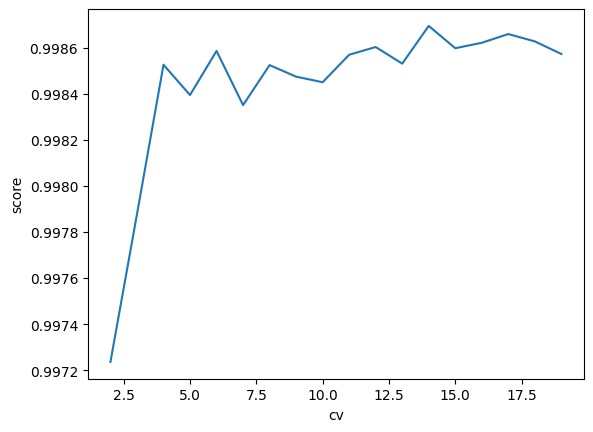

In [1267]:
sns.lineplot(x=cv_score_df['cv'],y=cv_score_df['score'])
plt.show()

# Hyperparameter tuning

In [1268]:
selected_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [1269]:
param_grid = {
'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
'max_features':['sqrt', 'log2']

 }



gridcv_model = GridSearchCV(estimator=selected_model, param_grid=param_grid, cv= cv_score_df.iloc[0,0],scoring='r2')
gridcv_model.fit(X_train, y_train)
     
print(gridcv_model .best_params_)
print(gridcv_model .best_score_)

{'criterion': 'squared_error', 'max_features': 'sqrt'}
0.9911447396384112


In [1270]:
gridcv_model.best_estimator_

ExtraTreesRegressor(max_features='sqrt')

# Final model

In [1271]:
fin_mod = gridcv_model.best_estimator_
fin_mod_y_pred = fin_mod.predict(X_test)
fin_mod_score = r2_score(y_test, fin_mod_y_pred)
fin_mod_score

0.9905861611186909

# Pickle File

In [1272]:
joblib.dump(fin_mod, "boston_housing_price.pkl")

['boston_housing_price.pkl']